# 1.0 IMPORTS

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt


from sklearn import model_selection as ms

In [2]:
#def hidden_law(x):
#	return math.sin (2*math.pi*x)

hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x))

x_all = np.arange(0, 1, 0.01)

y_hidden = hidden_law (x_all)

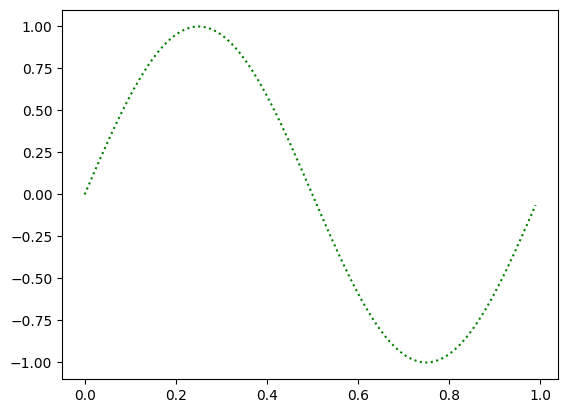

In [3]:
plt.plot(x_all, y_hidden, ':g')

# 2.0 DADOS SINTÉTICOS

In [4]:
np.random.seed(42)
noise = 0.2
samples = 20

#dataset
x = np.random.rand(samples)
y = np.sin(2*np.pi*x) + noise*np.random.randn(samples)

#split treino e teste
x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.30)

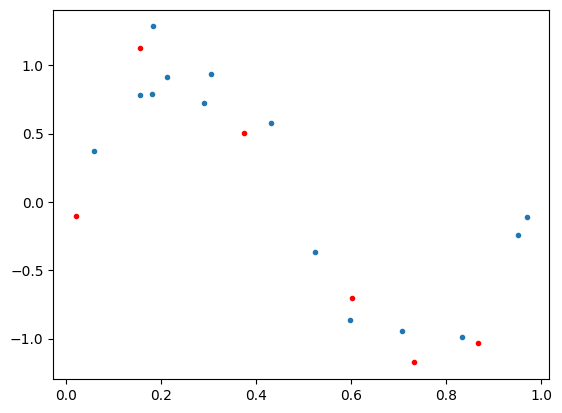

In [9]:
#plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_val, y_val, 'r.')

# TREINAMENTO

In [11]:
max_poly_degree = 14
poly_degrees = range (max_poly_degree)

polys = []
for p in poly_degrees:
    poly_model = np.polyfit(x_train, y_train, p)
    polys.append(poly_model)

In [13]:
rmse_train = np.zeros(max_poly_degree)
rmse_val = np.zeros(max_poly_degree)

for p in poly_degrees:
    #predição dados treino
    yhat_train = np.polyval(polys[p], x_train)
    rmse_train[p] = np.sqrt(np.mean(np.square((yhat_train - y_train))))
    
    #predição dados validação
    yhat_val = np.polyval(polys[p], x_val)
    rmse_val[p] = np.sqrt(np.mean(np.square((yhat_val - y_val))))

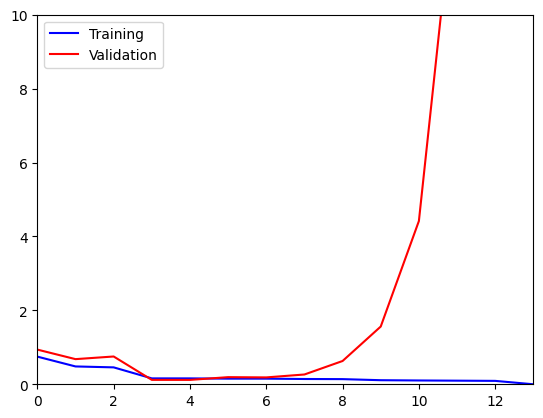

In [18]:
plt.plot(poly_degrees, rmse_train, 'b')
plt.plot(poly_degrees, rmse_val, 'r')
plt.axis((0, max_poly_degree-1, 0, 10))
plt.legend(['Training', 'Validation'])

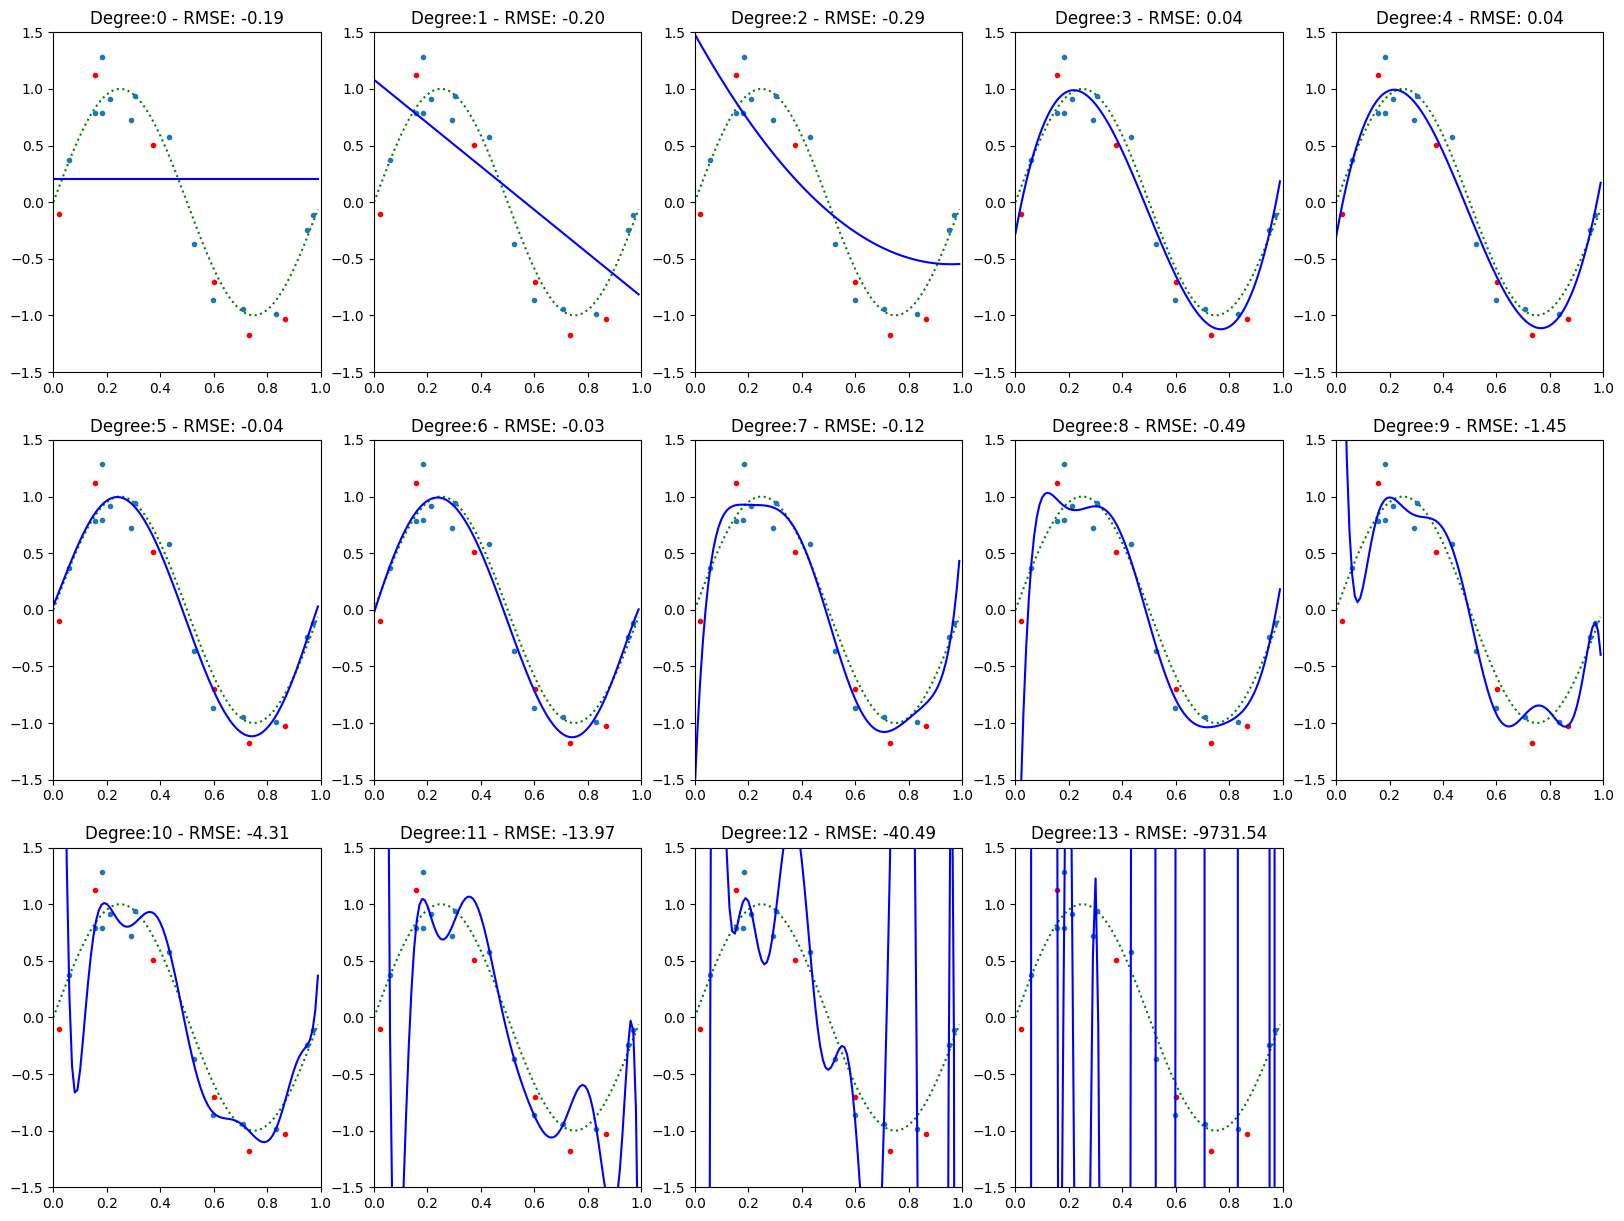

In [29]:
plt.figure(figsize=(20, 15))
for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, '.r')
    plt.plot(x_all, y_pol, 'b')
    plt.title ('Degree:{} - RMSE: {:.2f}'.format(p, rmse_train[p]-rmse_val[p]))
    plt.axis ((0, 1, -1.5, 1.5))